# End to End ML Model Development

- Problem Defination
- Data Collection
- Data Preprocessing
- Exploratory Data Analysis (EDA)
- Feature Selection and Scalling
- Model Selection and Trainning
- Assumptions Check
- Model Evaluation
- Save the Model


### Problem Defination 

In [1]:
from sklearn import datasets

In [2]:
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_arff_parser',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circl

In [1]:
from sklearn.datasets import fetch_california_housing

In [4]:
fetch_california_housing()

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
california = fetch_california_housing()
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [6]:
print(california["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [7]:
import pandas as pd
california.values()

dict_values([array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), None, ['MedHouseVal'], ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:*

### Method : 1

In [8]:
input_column = california["feature_names"]
X= pd.DataFrame(california["data"], columns=input_column)
output_column = california["target_names"]
Y= pd.DataFrame(california["target"],columns=output_column)
df = pd.concat([X,Y],axis=1)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### Method : 2

In [9]:
input_column = california["feature_names"]
df= pd.DataFrame(california["data"], columns=input_column)
output_column = california["target_names"][0]
df[output_column] = california["target"]
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [10]:
input_column = california["feature_names"]
X= pd.DataFrame(california["data"], columns=input_column)
output_column = california["target_names"]
Y= pd.DataFrame(california["target"],columns=output_column)
pd.concat([X,Y],axis=1)
#################################################################
input_column = california["feature_names"]
df= pd.DataFrame(california["data"], columns=input_column)
output_column = california["target_names"][0]
df[output_column] = california["target"]
df
#################################################################


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [11]:
california.frame

### Method : 3

In [3]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing(as_frame=True)
california["frame"]


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


- scalling required
- Encoding not required
- selection of feature required
     - VT method
     - VIF method


#### Step- 3 

## Feature Selection - Feature Scalling

#### Lets do the Drill

- Task - 1 : Scale the Data , then do the VIF
- Task - 2 : First do the VIF , then Scale the Datam

**Task - 1**
- whenever you scale the data exclude the Target Column

In [13]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_X = pd.DataFrame(ss.fit_transform(X), columns = california["feature_names"])
scaled_X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818
...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626


              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   

            Latitude  Longitude  
MedInc     -0.079809  -0.015176  
HouseAge    0.011173  -0.108197  
AveRooms    0.106389  -0.027540  
AveBedrms   0.069721   0.013344  
Population -0.108785   0.099773  
AveOccup    0.002366   0.002476  
Latitude    1.000000  -0.924664  
Longitude  -0.924664   1.000000  


<Axes: >

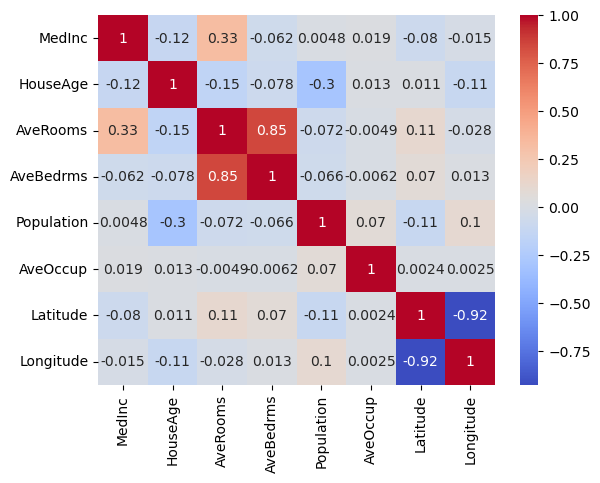

In [14]:
import seaborn as sns
corr_matrix = scaled_X.corr()

print(corr_matrix)
sns.heatmap(corr_matrix,
            annot=True,
           cmap = "coolwarm")

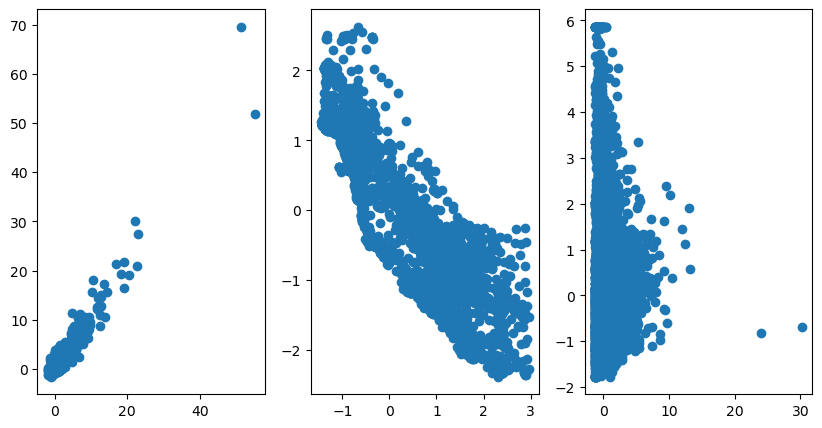

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.subplot(1,3,1).scatter(scaled_X['AveRooms'],scaled_X['AveBedrms'])
plt.subplot(1,3,2).scatter(scaled_X['Latitude'],scaled_X['Longitude'])
plt.subplot(1,3,3).scatter(scaled_X['Population'],scaled_X['MedInc'])

In [16]:
scaled_X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818
...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626


## VIF calculation

In [17]:
!pip install statsmodels

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = []
for i in range(len(scaled_X.columns)):
    vif.append(variance_inflation_factor(scaled_X,i))
vif_vals = pd.DataFrame(zip(scaled_X
                            .columns, vif), columns=["Feature", "VIF"])
vif_vals

,Feature,VIF
0,MedInc,2.501295
1,HouseAge,1.241254
2,AveRooms,8.342786
3,AveBedrms,6.994995
4,Population,1.138125
5,AveOccup,1.008324
6,Latitude,9.297624
7,Longitude,8.962263


In [19]:
scaled_X.values

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# X = df.drop("MedHouseVal",axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"]= [variance_inflation_factor(scaled_X.values,i) for i in range(len(scaled_X.columns))]
vif_data

,feature,VIF
0,MedInc,2.501295
1,HouseAge,1.241254
2,AveRooms,8.342786
3,AveBedrms,6.994995
4,Population,1.138125
5,AveOccup,1.008324
6,Latitude,9.297624
7,Longitude,8.962263


### Task : 2

In [5]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
input_column = california["feature_names"]
X= pd.DataFrame(california["data"], columns=input_column)
VIF = []
for i in range(len(X.columns)):
    VIF.append(variance_inflation_factor(X.values,i))
VIF_data = pd.DataFrame(zip(X.columns,VIF),columns=["Features","VIF"])
VIF_data

,Features,VIF
0,MedInc,11.511140
1,HouseAge,7.195917
2,AveRooms,45.993601
3,AveBedrms,43.590314
4,Population,2.935745
5,AveOccup,1.095243
6,Latitude,559.874071
7,Longitude,633.711654


In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_VIF = sc.fit_transform(VIF_data[["VIF"]])
Scaled_VIF_data= pd.DataFrame(zip(X.columns,scaled_VIF.flatten()), columns=["Features","Scaled_VIF"])
Scaled_VIF_data

,Features,Scaled_VIF
0,MedInc,-0.603250
1,HouseAge,-0.620407
2,AveRooms,-0.466152
3,AveBedrms,-0.475707
4,Population,-0.637345
5,AveOccup,-0.644662
6,Latitude,1.576976
7,Longitude,1.870545


- step : 1 - We read California using sklearn
- step : 2
- step : 3 - Feature Selection
                - Task 1 : Standardiztion then apply vif
                - Task 2 : Apply vif then do the Standardization


In [23]:
VIF_data

,Features,VIF
0,MedInc,11.511140
1,HouseAge,7.195917
2,AveRooms,45.993601
3,AveBedrms,43.590314
4,Population,2.935745
5,AveOccup,1.095243
6,Latitude,559.874071
7,Longitude,633.711654


In [7]:
VIF_data['VIF']
con=VIF_data['VIF']<15
VIF_data[con]
VIF_data[VIF_data['VIF']<15]['Features']
features_to_keep=VIF_data[VIF_data['VIF']<15]['Features'].to_list()
features_to_keep

['MedInc', 'HouseAge', 'Population', 'AveOccup']

In [11]:
housing_df = pd.DataFrame(zip())

In [12]:
housing_df_new=df[features_to_keep+['MedHouseVal']]
housing_df_new

,MedInc,HouseAge,Population,AveOccup,MedHouseVal
0,8.3252,41.0,322.0,2.555556,4.526
1,8.3014,21.0,2401.0,2.109842,3.585
2,7.2574,52.0,496.0,2.802260,3.521
3,5.6431,52.0,558.0,2.547945,3.413
4,3.8462,52.0,565.0,2.181467,3.422
...,...,...,...,...,...
20635,1.5603,25.0,845.0,2.560606,0.781
20636,2.5568,18.0,356.0,3.122807,0.771
20637,1.7000,17.0,1007.0,2.325635,0.923
20638,1.8672,18.0,741.0,2.123209,0.847


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features=scaler.fit_transform(df[features_to_keep])
scaled_features

array([[ 2.34476576,  0.98214266, -0.9744286 , -0.04959654],
       [ 2.33223796, -0.60701891,  0.86143887, -0.09251223],
       [ 1.7826994 ,  1.85618152, -0.82077735, -0.02584253],
       ...,
       [-1.14259331, -0.92485123, -0.3695372 , -0.0717345 ],
       [-1.05458292, -0.84539315, -0.60442933, -0.09122515],
       [-0.78012947, -1.00430931, -0.03397701, -0.04368215]])

In [14]:

data_scaled = pd.DataFrame(scaled_features, columns=features_to_keep)
data_scaled['MedHouseVal'] = df['MedHouseVal']
data_scaled.head()

,MedInc,HouseAge,Population,AveOccup,MedHouseVal
0,2.344766,0.982143,-0.974429,-0.049597,4.526
1,2.332238,-0.607019,0.861439,-0.092512,3.585
2,1.782699,1.856182,-0.820777,-0.025843,3.521
3,0.932968,1.856182,-0.766028,-0.050329,3.413
4,-0.012881,1.856182,-0.759847,-0.085616,3.422


In [15]:
X = data_scaled.drop("MedHouseVal",axis=1)
y = data_scaled["MedHouseVal"]

In [24]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y , test_size=0.2 , random_state=1234)

X_train

,MedInc,HouseAge,Population,AveOccup
17595,-0.264490,0.902685,-0.623857,-0.068678
6073,3.809412,0.267020,-0.998271,0.003332
6251,0.130715,0.267020,-0.087843,0.098398
3161,-1.108063,-0.209729,-0.179681,0.002216
1887,-0.379345,-0.130270,-0.366888,-0.051929
...,...,...,...,...
8222,0.594454,-0.607019,-1.233163,-0.121142
9449,-0.588317,-1.163225,-0.240611,-0.061446
8471,0.177720,0.346478,-0.311256,0.004673
17048,1.492349,1.220517,-0.168201,-0.046367


In [23]:
X_train.shape

(16512, 4)

In [32]:
X_test.shape

(4128, 4)

In [33]:
y_train.shape

(16512,)

In [34]:
y_test.shape

(4128,)

In [35]:
X_train.head()

,MedInc,HouseAge,Population,AveOccup
17595,-0.264490,0.902685,-0.623857,-0.068678
6073,3.809412,0.267020,-0.998271,0.003332
6251,0.130715,0.267020,-0.087843,0.098398
3161,-1.108063,-0.209729,-0.179681,0.002216
1887,-0.379345,-0.130270,-0.366888,-0.051929


In [36]:
y_train.head()

17595    2.35200
6073     5.00001
6251     1.63300
3161     0.68000
1887     0.86900
Name: MedHouseVal, dtype: float64

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)
y_pred

array([2.39342898, 3.2386258 , 2.3268187 , ..., 1.47678863, 2.46824721,
       1.74699013])

In [39]:
df=X_test.copy()
df["y_test(Actual)"] = y_test 
df["y_train(prediction)"] = y_pred


In [40]:
df

,MedInc,HouseAge,Population,AveOccup,y_test(Actual),y_train(prediction)
15712,-0.099733,1.856182,-0.716577,-0.129594,5.00000,2.393429
4119,0.885225,1.856182,0.367812,-0.009598,2.93900,3.238626
15725,0.002279,1.220517,-0.763379,-0.129966,4.12500,2.326819
14616,-0.210589,-0.686477,0.350151,0.031639,1.57600,1.744403
13238,2.027992,-1.481058,-0.180564,0.035508,3.04100,3.372339
...,...,...,...,...,...,...
13521,0.703519,-0.686477,-0.779274,-0.017558,1.64300,2.450694
16913,5.011449,-0.289187,0.071989,-0.007758,5.00001,6.107944
20069,-0.699541,0.108104,-1.045073,-0.045110,1.23200,1.476789
446,0.002279,1.856182,-0.917913,-0.113472,1.82600,2.468247


In [41]:
import numpy as np
error = df["y_test(Actual)"]-df["y_train(prediction)"]
df["Error"] = error
df

,MedInc,HouseAge,Population,AveOccup,y_test(Actual),y_train(prediction),Error
15712,-0.099733,1.856182,-0.716577,-0.129594,5.00000,2.393429,2.606571
4119,0.885225,1.856182,0.367812,-0.009598,2.93900,3.238626,-0.299626
15725,0.002279,1.220517,-0.763379,-0.129966,4.12500,2.326819,1.798181
14616,-0.210589,-0.686477,0.350151,0.031639,1.57600,1.744403,-0.168403
13238,2.027992,-1.481058,-0.180564,0.035508,3.04100,3.372339,-0.331339
...,...,...,...,...,...,...,...
13521,0.703519,-0.686477,-0.779274,-0.017558,1.64300,2.450694,-0.807694
16913,5.011449,-0.289187,0.071989,-0.007758,5.00001,6.107944,-1.107934
20069,-0.699541,0.108104,-1.045073,-0.045110,1.23200,1.476789,-0.244789
446,0.002279,1.856182,-0.917913,-0.113472,1.82600,2.468247,-0.642247


In [42]:
error_square = np.square(df["Error"])
df["Error_Square"]=error_square
df

,MedInc,HouseAge,Population,AveOccup,y_test(Actual),y_train(prediction),Error,Error_Square
15712,-0.099733,1.856182,-0.716577,-0.129594,5.00000,2.393429,2.606571,6.794212
4119,0.885225,1.856182,0.367812,-0.009598,2.93900,3.238626,-0.299626,0.089776
15725,0.002279,1.220517,-0.763379,-0.129966,4.12500,2.326819,1.798181,3.233456
14616,-0.210589,-0.686477,0.350151,0.031639,1.57600,1.744403,-0.168403,0.028359
13238,2.027992,-1.481058,-0.180564,0.035508,3.04100,3.372339,-0.331339,0.109786
...,...,...,...,...,...,...,...,...
13521,0.703519,-0.686477,-0.779274,-0.017558,1.64300,2.450694,-0.807694,0.652370
16913,5.011449,-0.289187,0.071989,-0.007758,5.00001,6.107944,-1.107934,1.227518
20069,-0.699541,0.108104,-1.045073,-0.045110,1.23200,1.476789,-0.244789,0.059921
446,0.002279,1.856182,-0.917913,-0.113472,1.82600,2.468247,-0.642247,0.412481


In [43]:
mse = np.sum(df["Error_Square"])/len(X_test)
print(mse)
rmse = np.sqrt(mse)
print(rmse)

0.6750349701756313
0.8216051181532594


### Save the model 

1) Using Pickle

- Saviing the Model
- It is similar to python read text and write text
- open(filename.txt,"w")
- pickle.dump(model,open("modelname.pkl","wb"))

In [50]:
import pickle
pickle.dump(model,
           open("house_model.pkl","wb"))
LR = pickle.load(open("house_model.pkl","rb"))

### Batch Predictions 

In [54]:
X_test.values
# when we are passing nultiple values using a Dataframe
# is called as batch predictions
LR.predict(X_test)

array([2.39342898, 3.2386258 , 2.3268187 , ..., 1.47678863, 2.46824721,
       1.74699013])

### Real time predictions 

In [55]:
LR.predict([[10,20,30,40]])


C:\Users\chand\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14.29827028])